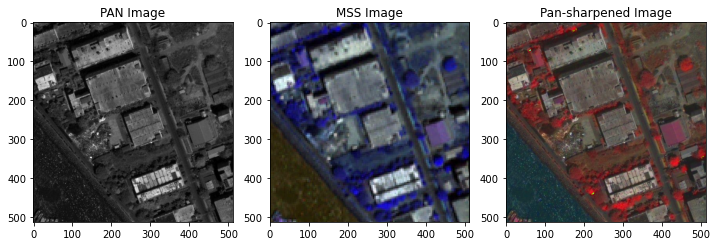

In [3]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def standardize(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized_data = (data - mean) / std_dev
    return standardized_data, mean, std_dev

def calculate_covariance(data):
    covariance_matrix = np.cov(data, rowvar=False)
    return covariance_matrix

def perform_pca(data):
    pca = PCA(n_components=data.shape[1])
    principal_components = pca.fit_transform(data)
    eigen_values = pca.explained_variance_
    eigen_vectors = pca.components_
    return principal_components, eigen_values, eigen_vectors

def inverse_transform(pca_data, eigen_vectors, mean, std_dev):
    data = np.dot(pca_data, eigen_vectors)
    data = (data * std_dev) + mean
    return data

def pan_sharpen(pan_image, mss_image):
    # Flatten the images
    pan_flat = pan_image.flatten()
    mss_flat = mss_image.reshape(-1, mss_image.shape[-1])

    # Standardize the data
    standardized_pan, pan_mean, pan_std_dev = standardize(pan_flat)
    standardized_mss, mss_mean, mss_std_dev = standardize(mss_flat)

    # Perform PCA
    pca_pan, pan_eigen_values, pan_eigen_vectors = perform_pca(standardized_pan.reshape(-1, 1))
    pca_mss, mss_eigen_values, mss_eigen_vectors = perform_pca(standardized_mss)

    # Pan-sharpening by replacing the first principal component of MSS with PAN
    pca_mss[:, 0] = pca_pan.flatten()

    # Inverse transform to get the pan-sharpened image
    pan_sharpened_flat = inverse_transform(pca_mss, mss_eigen_vectors, mss_mean, mss_std_dev)
    pan_sharpened_image = pan_sharpened_flat.reshape(mss_image.shape)

    return pan_sharpened_image

# Read the input images
pan_image = cv2.imread(r'C:\Users\SHIKHAR AGARWAL\OneDrive\Pictures\Desktop\DEAL DRDO PROJECT\pan_512 x 512.jpg', cv2.IMREAD_GRAYSCALE)

# Assuming the MSS image is in a specific format, you might need to adjust the reading mechanism
mss_image = np.fromfile(r'C:\Users\SHIKHAR AGARWAL\OneDrive\Pictures\Desktop\DEAL DRDO PROJECT\mss_512 x 512 x 3.raw', dtype=np.uint8)
mss_image = mss_image.reshape((512, 512, 3))

# Correct the color channel order by converting BGR to RGB
mss_image = cv2.cvtColor(mss_image, cv2.COLOR_BGR2RGB)

# Resize images to 512x512 if necessary
pan_image = cv2.resize(pan_image, (512, 512))
mss_image = cv2.resize(mss_image, (512, 512))

# Perform pan-sharpening
pan_sharpened_image = pan_sharpen(pan_image, mss_image)

# Correct the color channel order of the pan-sharpened image if necessary
pan_sharpened_image = cv2.cvtColor(pan_sharpened_image.astype(np.uint8), cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('PAN Image')
plt.imshow(pan_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('MSS Image')
plt.imshow(mss_image)

plt.subplot(1, 3, 3)
plt.title('Pan-sharpened Image')
plt.imshow(pan_sharpened_image)

plt.tight_layout()
plt.show()


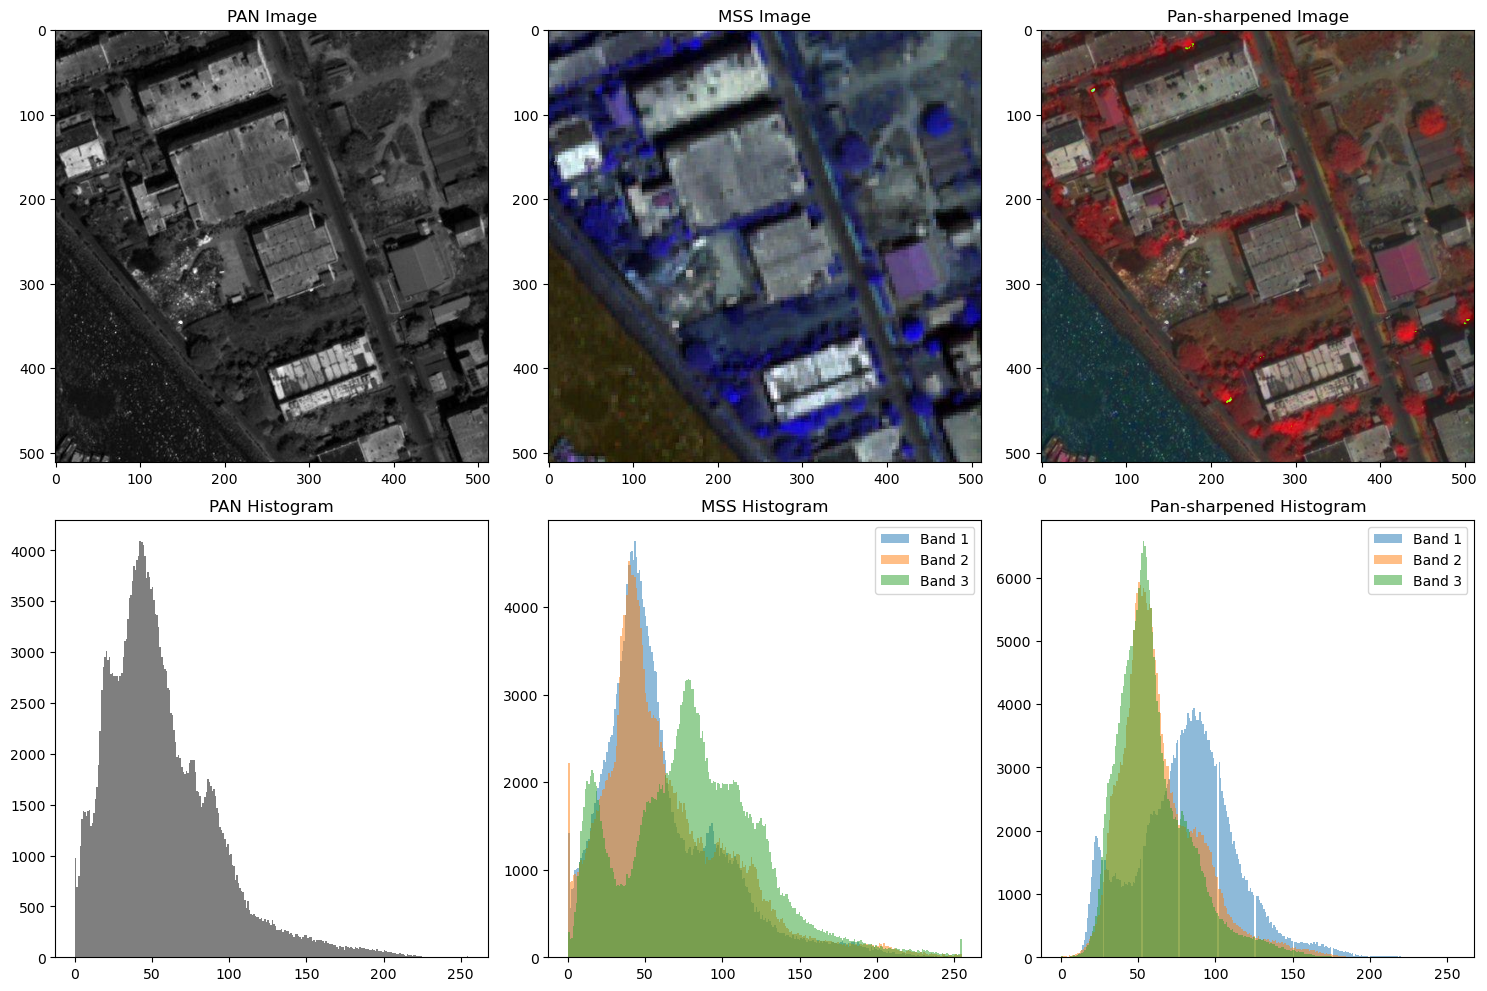

In [1]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def standardize(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized_data = (data - mean) / std_dev
    return standardized_data, mean, std_dev

def calculate_covariance(data):
    covariance_matrix = np.cov(data, rowvar=False)
    return covariance_matrix

def perform_pca(data):
    pca = PCA(n_components=data.shape[1])
    principal_components = pca.fit_transform(data)
    eigen_values = pca.explained_variance_
    eigen_vectors = pca.components_
    return principal_components, eigen_values, eigen_vectors

def inverse_transform(pca_data, eigen_vectors, mean, std_dev):
    data = np.dot(pca_data, eigen_vectors)
    data = (data * std_dev) + mean
    return data

def pan_sharpen(pan_image, mss_image):
    # Flatten the images
    pan_flat = pan_image.flatten()
    mss_flat = mss_image.reshape(-1, mss_image.shape[-1])

    # Standardize the data
    standardized_pan, pan_mean, pan_std_dev = standardize(pan_flat)
    standardized_mss, mss_mean, mss_std_dev = standardize(mss_flat)

    # Perform PCA
    pca_pan, pan_eigen_values, pan_eigen_vectors = perform_pca(standardized_pan.reshape(-1, 1))
    pca_mss, mss_eigen_values, mss_eigen_vectors = perform_pca(standardized_mss)

    # Pan-sharpening by replacing the first principal component of MSS with PAN
    pca_mss[:, 0] = pca_pan.flatten()

    # Inverse transform to get the pan-sharpened image
    pan_sharpened_flat = inverse_transform(pca_mss, mss_eigen_vectors, mss_mean, mss_std_dev)
    pan_sharpened_image = pan_sharpened_flat.reshape(mss_image.shape)

    return pan_sharpened_image

# Read the input images
pan_image = cv2.imread(r'C:\Users\SHIKHAR AGARWAL\OneDrive\Pictures\Desktop\DEAL DRDO PROJECT\pan_512 x 512.jpg', cv2.IMREAD_GRAYSCALE)

# Assuming the MSS image is in a specific format, you might need to adjust the reading mechanism
mss_image = np.fromfile(r'C:\Users\SHIKHAR AGARWAL\OneDrive\Pictures\Desktop\DEAL DRDO PROJECT\mss_512 x 512 x 3.raw', dtype=np.uint8)
mss_image = mss_image.reshape((512, 512, 3))

# Correct the color channel order by converting BGR to RGB
mss_image = cv2.cvtColor(mss_image, cv2.COLOR_BGR2RGB)

# Resize images to 512x512 if necessary
pan_image = cv2.resize(pan_image, (512, 512))
mss_image = cv2.resize(mss_image, (512, 512))

# Perform pan-sharpening
pan_sharpened_image = pan_sharpen(pan_image, mss_image)

# Correct the color channel order of the pan-sharpened image if necessary
pan_sharpened_image = cv2.cvtColor(pan_sharpened_image.astype(np.uint8), cv2.COLOR_BGR2RGB)

# Display the images and their histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('PAN Image')
plt.imshow(pan_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('MSS Image')
plt.imshow(mss_image)

plt.subplot(2, 3, 3)
plt.title('Pan-sharpened Image')
plt.imshow(pan_sharpened_image)

plt.subplot(2, 3, 4)
plt.title('PAN Histogram')
plt.hist(pan_image.ravel(), bins=256, color='black', alpha=0.5)

plt.subplot(2, 3, 5)
plt.title('MSS Histogram')
for i in range(3):
    plt.hist(mss_image[:, :, i].ravel(), bins=256, alpha=0.5, label=f'Band {i+1}')
plt.legend()

plt.subplot(2, 3, 6)
plt.title('Pan-sharpened Histogram')
for i in range(3):
    plt.hist(pan_sharpened_image[:, :, i].ravel(), bins=256, alpha=0.5, label=f'Band {i+1}')
plt.legend()

plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 1464.382433573405
Structural Similarity Index (SSIM): 0.3998517955996192


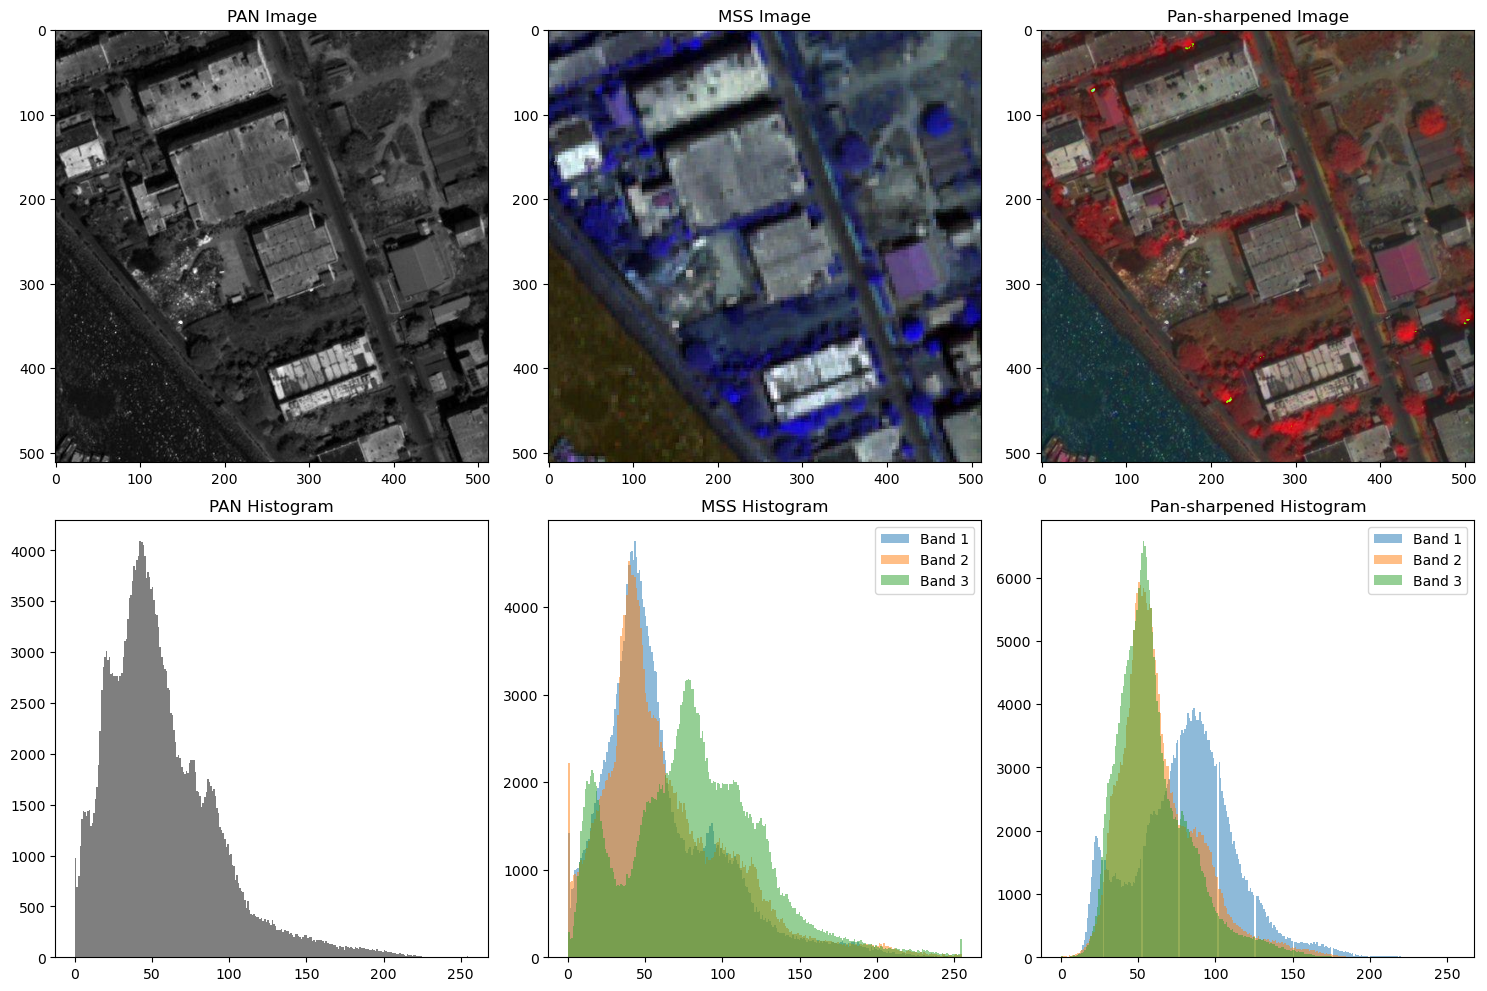

In [2]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity as ssim

def standardize(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized_data = (data - mean) / std_dev
    return standardized_data, mean, std_dev

def calculate_covariance(data):
    covariance_matrix = np.cov(data, rowvar=False)
    return covariance_matrix

def perform_pca(data):
    pca = PCA(n_components=data.shape[1])
    principal_components = pca.fit_transform(data)
    eigen_values = pca.explained_variance_
    eigen_vectors = pca.components_
    return principal_components, eigen_values, eigen_vectors

def inverse_transform(pca_data, eigen_vectors, mean, std_dev):
    data = np.dot(pca_data, eigen_vectors)
    data = (data * std_dev) + mean
    return data

def pan_sharpen(pan_image, mss_image):
    # Flatten the images
    pan_flat = pan_image.flatten()
    mss_flat = mss_image.reshape(-1, mss_image.shape[-1])

    # Standardize the data
    standardized_pan, pan_mean, pan_std_dev = standardize(pan_flat)
    standardized_mss, mss_mean, mss_std_dev = standardize(mss_flat)

    # Perform PCA
    pca_pan, pan_eigen_values, pan_eigen_vectors = perform_pca(standardized_pan.reshape(-1, 1))
    pca_mss, mss_eigen_values, mss_eigen_vectors = perform_pca(standardized_mss)

    # Pan-sharpening by replacing the first principal component of MSS with PAN
    pca_mss[:, 0] = pca_pan.flatten()

    # Inverse transform to get the pan-sharpened image
    pan_sharpened_flat = inverse_transform(pca_mss, mss_eigen_vectors, mss_mean, mss_std_dev)
    pan_sharpened_image = pan_sharpened_flat.reshape(mss_image.shape)

    return pan_sharpened_image

# Read the input images
pan_image = cv2.imread(r'C:\Users\SHIKHAR AGARWAL\OneDrive\Pictures\Desktop\DEAL DRDO PROJECT\pan_512 x 512.jpg', cv2.IMREAD_GRAYSCALE)

# Assuming the MSS image is in a specific format, you might need to adjust the reading mechanism
mss_image = np.fromfile(r'C:\Users\SHIKHAR AGARWAL\OneDrive\Pictures\Desktop\DEAL DRDO PROJECT\mss_512 x 512 x 3.raw', dtype=np.uint8)
mss_image = mss_image.reshape((512, 512, 3))

# Correct the color channel order by converting BGR to RGB
mss_image = cv2.cvtColor(mss_image, cv2.COLOR_BGR2RGB)

# Resize images to 512x512 if necessary
pan_image = cv2.resize(pan_image, (512, 512))
mss_image = cv2.resize(mss_image, (512, 512))

# Perform pan-sharpening
pan_sharpened_image = pan_sharpen(pan_image, mss_image)

# Correct the color channel order of the pan-sharpened image if necessary
pan_sharpened_image = cv2.cvtColor(pan_sharpened_image.astype(np.uint8), cv2.COLOR_BGR2RGB)

# Calculate quantitative metrics with adjusted window size
mse = mean_squared_error(mss_image, pan_sharpened_image)
ssim_value = ssim(mss_image, pan_sharpened_image, win_size=7, channel_axis=-1)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Structural Similarity Index (SSIM): {ssim_value}')

# Display the images and their histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('PAN Image')
plt.imshow(pan_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('MSS Image')
plt.imshow(mss_image)

plt.subplot(2, 3, 3)
plt.title('Pan-sharpened Image')
plt.imshow(pan_sharpened_image)

plt.subplot(2, 3, 4)
plt.title('PAN Histogram')
plt.hist(pan_image.ravel(), bins=256, color='black', alpha=0.5)

plt.subplot(2, 3, 5)
plt.title('MSS Histogram')
for i in range(3):
    plt.hist(mss_image[:, :, i].ravel(), bins=256, alpha=0.5, label=f'Band {i+1}')
plt.legend()

plt.subplot(2, 3, 6)
plt.title('Pan-sharpened Histogram')
for i in range(3):
    plt.hist(pan_sharpened_image[:, :, i].ravel(), bins=256, alpha=0.5, label=f'Band {i+1}')
plt.legend()

plt.tight_layout()
plt.show()
